In [23]:
#1
!pip install PyPDF2
!pip install py-readability-metrics

In [29]:
#2
import nltk
import re
import PyPDF2
from PyPDF2 import PdfReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from readability import Readability
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/sneha03/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sneha03/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#3

Reuters: Reports that Claudine Gay is submitting corrections for citation errors in her dissertation after a Harvard review found inadequate attribution but concluded her work did not rise to the level of research misconduct. It also mentions the broader context of challenges to her leadership related to antisemitism controversy and pressure from donors and stakeholders. The story emphasizes official statements and process, maintaining a neutral narrative focused on facts and institutional responses.​

Fox News: Highlights that Gay faces more than 40 additional plagiarism allegations, portraying the situation as a pattern of misconduct and questioning whether Harvard will hold her to the same standards as students. The story includes opinions from critics, notes cultural and political implications, and describes the institutional response as questionable. Coverage is more sensational, listing complaints and opinions and presenting defenders and critics.

Source	        Tone	                                                 Objectivity/Sentiment
Reuters	   Neutral, factual	            Prioritizes institutional facts, presents context without emotional or partisan framing ​
Fox News  Critical, controversial	    Sensational and scrutinizing, highlights allegations and controversy, less detached 

In [63]:
#4a
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

foxnews_text = extract_text_from_pdf("data/foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
reuters_text = extract_text_from_pdf("data/reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")


In [75]:
foxnews_text_=foxnews_text
reuters_text_=reuters_text
print("Fox News Text Sample:\n", foxnews_text_)
print("\nReuters Text Sample:\n", reuters_text_)

Fox News Text Sample:
 Embattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, th

In [65]:
# example: raw text already in variable 'article_text'
start_kws = "Embattled Harvard University President Claudine Gay"
end_kws = "Sibarium wrote."

start_idxs = foxnews_text.find(start_kws)
end_idxs =foxnews_text.find(end_kws)

foxnews_text = foxnews_text[start_idxs:end_idxs]
print("Fox News Text Sample:\n",foxnews_text)

Fox News Text Sample:
 Embattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, th

In [66]:

start_kw = "Harvard University's president was planning to"
end_kw = "The University of Pennsylvania's president, Liz Magill"

start_idx = reuters_text.find(start_kw)
end_idx =reuters_text.find(end_kw)

#cleaned_text = reuters_text.replace("Advertisement · Scroll to continue", "")

reuters_text = reuters_text[start_idx:end_idx]
print("Reuters News Text Sample:\n",reuters_text)

Reuters News Text Sample:
 Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing board.
Advertisement · Scroll to continue
2 / 3Questions about Gay's academic integrity have rocked her already tumultuous first semester
as the university's first Black president, as she faced a pressure campaign to resign over her
congressional testimony about antisemitism on campus earlier this month.
The plagiarism allegations against Gay were brought to the attention of the Harvard
Corporation on Oct. 24 through a media request by the New Y ork Post newspaper , the
university spokesperson s

In [67]:
#4b
def check_for_garbled_text(text):
    # Search for lines with non-standard ASCII or lots of replacement characters 
    garbled = [line for line in text.split('\n') if re.search(r'[�]{2,}', line) or re.search(r'[^ -~\n]{5,}', line)]
    if garbled:
        print("Garbled text detected in these lines:")
        for g in garbled:
            print(g)
    else:
        print("No obvious garbled text detected.")
#� is a clear sign the extractor failed to interpret a character.
#Sequences of unusual characters (not part of normal English or punctuation) can mean encoding problems, font issues, or parts of the file that weren’t really text.


In [68]:
def check_for_missing_characters(text):
    # Count suspect lines, e.g., unusually short or fragmented
    short_lines = [line for line in text.split('\n') if 0 < len(line) < 10]
    print(f"{len(short_lines)} unusually short lines (possible missing content).")

In [69]:
def check_for_special_characters(text):
    # Find special/unusual characters
    specials = set(re.findall(r'[^a-zA-Z0-9.,;:!? \n\'\"()/-]', text))
    if specials:
        print(f"Found special/misread characters: {specials}")
    else:
        print("No unexpected special characters found.")

In [70]:
check_for_garbled_text(foxnews_text)
check_for_missing_characters(foxnews_text)
check_for_special_characters(foxnews_text)

check_for_garbled_text(reuters_text)
check_for_missing_characters(reuters_text)
check_for_special_characters(reuters_text)

No obvious garbled text detected.
3 unusually short lines (possible missing content).
Found special/misread characters: {'’', '—', '‘'}
No obvious garbled text detected.
1 unusually short lines (possible missing content).
Found special/misread characters: {'·'}


Checked the text based on the above anomalies, they are genuine, thus leaving the extracted text as is.

In [71]:
#5a
sia = SentimentIntensityAnalyzer()

foxnews_scores = sia.polarity_scores(foxnews_text)
reuters_scores = sia.polarity_scores(reuters_text)

print("FOX News:", foxnews_scores)
print("Reuters:", reuters_scores)

FOX News: {'neg': 0.07, 'neu': 0.847, 'pos': 0.083, 'compound': 0.7938}
Reuters: {'neg': 0.072, 'neu': 0.91, 'pos': 0.018, 'compound': -0.9555}


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool built into NLTK.
It uses a large dictionary (lexicon) of English words, each pre-labeled with a sentiment score ranging from negative to positive.
VADER analyzes sentences by breaking them down into individual words and phrases.
Each word's sentiment score is adjusted by context
Typical thresholds:
> 0.05: Positive
< -0.05: Negative
-0.05 to 0.05: Neutral

#5b
No, the results do not correspond to what is expected:

The FOX News article, from examination, is highly critical, focuses on controversy, and uses charged language surrounding plagiarism—this should not lead to a high positive compound score, if anything, it should be more negative or at least neutral.​

The Reuters article is comparatively neutral and factual, avoiding emotional or judgmental phrasing. A strongly negative compound score is not a fair reflection of its tone.

This illustrates that automated sentiment analysis tools may not reliably capture nuance, especially in complex news reporting.

In [86]:
#6a

lines = foxnews_text_.split('\n')

# Collect potential headlines: ALL CAPS or Title Case and not too short
headlines = [
    line.strip()
    for line in lines
    if (line.isupper() and len(line.split()) > 1) or (line.istitle() and len(line.split()) < 15)
]

# Remove duplicates and print
headlines = list(dict.fromkeys(headlines))
for hl in headlines:
    print(hl)

first_headlines = [line.strip() for line in lines if line.strip()][:5]
print(first_headlines)

Media
By Brian Flood  Fox News
HAR VARD BOARD ST ANDS BY EMBA TTLED PRESIDENT CLAUDINE GA Y, ADMITS
‘INADEQUA TE CIT ATION’ IN SOME WRITINGS
Getty Images)
3 / 5NAACP LEADER DEFENDS HAR VARD PRESIDENT CLAUDINE GA Y, SAYS CRITICS
ARE 'ADV ANCING A WHITE SUPREMACIST AGENDA'
['Embattled Harvard University President Claudine Gay hit', 'with more plagiarism charges', 'foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges', 'Media', 'Harvard ‘received a complaint outlining over 40 allegations of']


Its not able to extract the right heading based on the above parameters.

In [88]:

lines = reuters_text_.split('\n')

# Collect potential headlines: ALL CAPS or Title Case and not too short
headlines = [
    line.strip()
    for line in lines
    if (line.isupper() and len(line.split()) > 1) or (line.istitle() and len(line.split()) < 15)
]

# Remove duplicates and print
headlines = list(dict.fromkeys(headlines))
for hl in headlines:
    print(hl)

first_headlines_ = [line.strip() for line in lines if line.strip()][:5]
print(first_headlines_)

["Harvard University's president was planning to submit three corrections to", 'her 1997 dissertation after a committee investigating plagiarism allegations against her found', 'that she had made citation errors, a university spokesperson said.', "Claudine Gay , who was inaugurated as Harvard's president in September , has already", 'submitted corrections to two published articles in recent weeks that were the focus of a']


running sentiment analysis on these headings extracted..

In [96]:
for headline in first_headlines:
    scores = sia.polarity_scores(headline)
    print("Fox News")
    print(f"Headline: {headline}\nScores: {scores}\n")

for headline in first_headlines_:
    scores = sia.polarity_scores(headline)
    print("Reuters News")
    print(f"Headline: {headline}\nScores: {scores}\n")



Fox News
Headline: Embattled Harvard University President Claudine Gay hit
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Fox News
Headline: with more plagiarism charges
Scores: {'neg': 0.442, 'neu': 0.558, 'pos': 0.0, 'compound': -0.3353}

Fox News
Headline: foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Fox News
Headline: Media
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Fox News
Headline: Harvard ‘received a complaint outlining over 40 allegations of
Scores: {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

Reuters News
Headline: Harvard University's president was planning to submit three corrections to
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Reuters News
Headline: her 1997 dissertation after a committee investigating plagiarism allegations against her found
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0

Fox News Headlines have a compunded negative value and Reuters is more or less neutral which doesnt match the article scores or the the actual tone. 

In [92]:
#7
fox_readability = Readability(foxnews_text)
reuters_readability = Readability(reuters_text)

# We will use 3 scores: Flesch-Kincaid Grade Level, Dale-Chall Score, and Gunning Fog Index
readability_data = {
    'Source': ['Fox News', 'Reuters'],
    'Flesch-Kincaid Grade Level': [fox_readability.flesch_kincaid().score, reuters_readability.flesch_kincaid().score],
    'Dale-Chall Readability Score': [fox_readability.dale_chall().score, reuters_readability.dale_chall().score],
    'Gunning Fog Index': [fox_readability.gunning_fog().score, reuters_readability.gunning_fog().score]
}
readability_df = pd.DataFrame(readability_data)
print("\n--- 7.b. Comparison of Readability Scores ---")
print(readability_df)


--- 7.b. Comparison of Readability Scores ---
     Source  Flesch-Kincaid Grade Level  Dale-Chall Readability Score  \
0  Fox News                   22.447131                     13.663264   
1   Reuters                   19.919564                     12.425534   

   Gunning Fog Index  
0          24.860707  
1          22.212149  


#7a
Flesch–Kincaid Grade Level:
This score estimates the U.S. school grade level necessary to understand the text. Higher scores mean the text is harder to read and requires a more advanced reading ability. It is based on sentence length and word syllable count.

Dale–Chall Readability Score:
This score measures the readability using a list of familiar words. It reflects how difficult a text is for readers in grades 4 and above, with higher scores indicating more challenging vocabulary and structure.

Gunning Fog Index:
This index also indicates years of education required to understand the text on the first reading. It’s based on average sentence length and the percentage of complex words (words with three or more syllables); higher scores mean more difficult reading.

#7b
Fox News article is more difficult to read across all three metrics, requiring a higher estimated grade level and containing more complex sentences and vocabulary.

Reuters article is easier to read, with all three scores lower,indicating shorter sentences and simpler word choices.

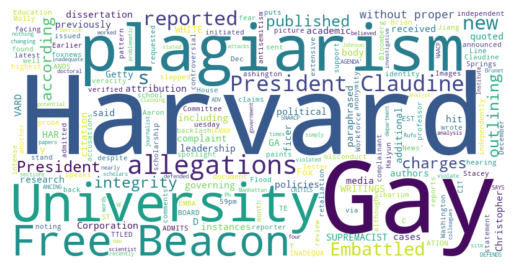

In [101]:
#8
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(foxnews_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

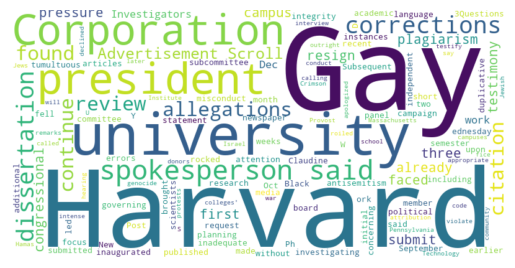

In [102]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reuters_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#8b
Based on the above word clouds I dont see a significant difference on the major keywords which seems to be accurate as both the News articles are reporting on the same agenda. 